In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ARMA import ARMA  # Custom module to simulate series. Can be replaced with statsmodels.

In [20]:
repetitions = 10000
models = ['model_a', 'model_b', 'model_c']
series_lengths = [25, 50, 100, 250, 500]
percentiles = [10, 5, 2.5, 1]

In [3]:
# Creating an empty list for each model and length.
# t_values = {'model_a': {25: [], ...}, 'model_b': {25: [], ...}, ...}
t_values = {model: {series_length: [] for series_length in series_lengths} for model in models}

for series_length in series_lengths:
    for __ in range(repetitions):

        y = ARMA.generate_ar(series_length, [1])  # y_{t} = y_{t-1} + e_{t}
        delta_y = np.diff(y)  # delta_y_{t} = y_{t+1} - y_{t}
        alpha = np.ones(series_length)  # alpha = 1
        beta_t = np.arange(series_length)  # beta*t = [0, 1, 2, ...]

        # Model a:
        regressors_a = y[:-1]  # This makes y and delta_y have the same size.
        results_a = sm.OLS(delta_y, regressors_a).fit()
        t_values['model_a'][series_length].append(results_a.tvalues[0])

        # Model b:
        regressors_b = np.column_stack((y, alpha))[:-1]
        results_b = sm.OLS(delta_y, regressors_b).fit()
        t_values['model_b'][series_length].append(results_b.tvalues[0])

        # Model c:
        regressors_c = np.column_stack((y, alpha, beta_t))[:-1]
        results_c = sm.OLS(delta_y, regressors_c).fit()
        t_values['model_c'][series_length].append(results_c.tvalues[0])

In [4]:
# Creating an empty DataFrame to store the critical values.
index = pd.MultiIndex.from_product([models, series_lengths])
df_table = pd.DataFrame(columns=percentiles, index=index)

# Filling the DataFrame.
for model in models:
    for series_length in series_lengths:
        for percentile in percentiles:
            critical_t_value = np.percentile(t_values[model][series_length], percentile)
            df_table.loc[(model, series_length), percentile] = critical_t_value

In [21]:
df_table.astype(float).round(2)

10.0  5.0   2.5   1.0 
model_a 25  -1.61 -1.96 -2.28 -2.66
        50  -1.61 -1.95 -2.24 -2.61
        100 -1.62 -1.95 -2.24 -2.59
        250 -1.62 -1.95 -2.24 -2.58
        500 -1.62 -1.94 -2.23 -2.57
model_b 25  -2.64 -2.99 -3.32 -3.73
        50  -2.60 -2.92 -3.22 -3.57
        100 -2.58 -2.89 -3.16 -3.49
        250 -2.57 -2.87 -3.13 -3.45
        500 -2.57 -2.87 -3.13 -3.44
model_c 25  -3.24 -3.61 -3.95 -4.39
        50  -3.18 -3.50 -3.80 -4.15
        100 -3.15 -3.46 -3.73 -4.06
        250 -3.14 -3.43 -3.69 -4.00
        500 -3.13 -3.42 -3.67 -3.98

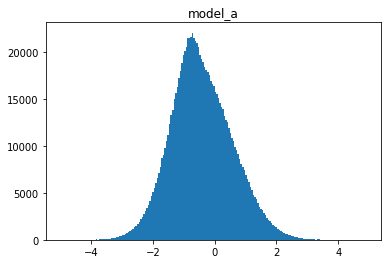

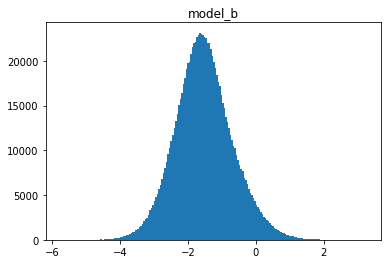

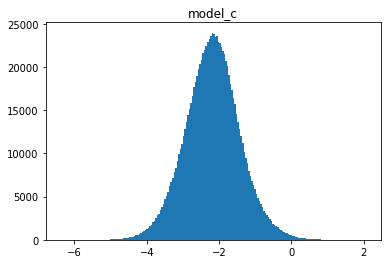

In [22]:
sel_length = 500

for model_name in models:
    plt.title(model_name)
    plt.hist(t_values[model_name][sel_length], bins=200)
    plt.show()